## Logika UI 1
- Import data

### Library

In [1]:
# to read
import numpy as np
import pandas as pd

# else, below each subbab

### 1. Cleansing
Do read data, labelling, and inner join.

In [2]:
## Read data, yeah.
X = pd.read_csv("/kaggle/input/stclogikaui23/application_record.csv")
print(X.shape)

y = pd.read_csv("/kaggle/input/stclogikaui23/credit_record.csv")
y.head()

(438557, 18)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [23]:
## Cleansing X
#: asint, 0-1 to words, days into years, 
#: NAN into Other, object to category
X1 = X.copy()
# print(X1.head())

print(X1.info())

X1["CNT_FAM_MEMBERS"] = X1["CNT_FAM_MEMBERS"].astype(dtype="int64")

flag = X1.columns[12:16]
for j in flag:
    X1[j].replace([0,1], ["N", "Y"], inplace=True)
    pass

# YEARS THINGY
days = [j for j in X1.columns if j.startswith("DAYS")]
for j in days:
    X1["YEARS_"+j.split("_")[1]] = X1[j]/-365.25
    #X1.drop(j, inplace=True)
    pass
    
X1["OCCUPATION_TYPE"].fillna("Others", inplace=True)

# DO_WORK variable
X1.loc[X1.YEARS_EMPLOYED.le(0),"YEARS_EMPLOYED"] = 0

X1["DO_WORK"] = "Y"
X1.loc[X1.YEARS_EMPLOYED.le(0),"DO_WORK"] = "N"

# MARRIAGE

X1["NAME_FAMILY_STATUS"].replace(["Civil marriage", "Widow"], ["Married", "Separated"], inplace=True)

# Let see
X1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_BIRTH,YEARS_EMPLOYED,DO_WORK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,-4542,Y,Y,N,N,Others,2,32.867899,12.435318,Y
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,-4542,Y,Y,N,N,Others,2,32.867899,12.435318,Y
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,Y,N,N,N,Security staff,2,58.792608,3.104723,Y
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,Y,N,Y,Y,Sales staff,1,52.320329,8.353183,Y
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,Y,N,Y,Y,Sales staff,1,52.320329,8.353183,Y


In [24]:
y1 = y.copy()
print(y1.ID.nunique())

# Cleansing y FIRST VERSION
# 1 is BAD
y1.STATUS.replace("2 3 4 5 0 1 C X".split(),
                  [1,1,1,1,0,0,0,0], inplace=True)
y1["STATUS"] = y1.groupby("ID")["STATUS"].transform("sum") > 0

y1["CREDIT"] = "Good"
y1.loc[y1["STATUS"], "CREDIT"] = "Bad"

y1 = y1[["ID", "CREDIT"]].drop_duplicates()

y1[y1.CREDIT=="Bad"]


# # Cleansing y 2nd VERSION
# y1["CREDIT"] = "Bad"
# y1.loc[y1.STATUS.isin("0 1 C X".split()), "CREDIT"] = "Good"

45985


,ID,CREDIT
8865,5002126,Bad
11774,5002255,Bad
12322,5002283,Bad
12793,5002303,Bad
14483,5002380,Bad
...,...,...
1040943,5149834,Bad
1041024,5149838,Bad
1044484,5150049,Bad
1046230,5150238,Bad


In [25]:
# Inner join y and x
df1 = y1.merge(X1, on="ID", how="inner")
print(df1.info())
df1.head()

# YEARS THINGY, MORE ACCURATE
# df1.YEARS_BIRTH = df1.YEARS_BIRTH + df1.MONTHS_BALANCE/12
# df1.YEARS_EMPLOYED = df1.YEARS_EMPLOYED + df1.MONTHS_BALANCE/12

(df1.CREDIT=="Bad").sum()/df1.shape[0]*100

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CREDIT               36457 non-null  object 
 2   CODE_GENDER          36457 non-null  object 
 3   FLAG_OWN_CAR         36457 non-null  object 
 4   FLAG_OWN_REALTY      36457 non-null  object 
 5   CNT_CHILDREN         36457 non-null  int64  
 6   AMT_INCOME_TOTAL     36457 non-null  float64
 7   NAME_INCOME_TYPE     36457 non-null  object 
 8   NAME_EDUCATION_TYPE  36457 non-null  object 
 9   NAME_FAMILY_STATUS   36457 non-null  object 
 10  NAME_HOUSING_TYPE    36457 non-null  object 
 11  DAYS_BIRTH           36457 non-null  int64  
 12  DAYS_EMPLOYED        36457 non-null  int64  
 13  FLAG_MOBIL           36457 non-null  object 
 14  FLAG_WORK_PHONE      36457 non-null  object 
 15  FLAG_PHONE           36457 non-null 

1.6896617933455853

### 2. EDA
Does contain boxplots and stacked barplots.  
Why, don't we make a function?
- Indeed, useless count, bar, mosaic, and partially boxen plots.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

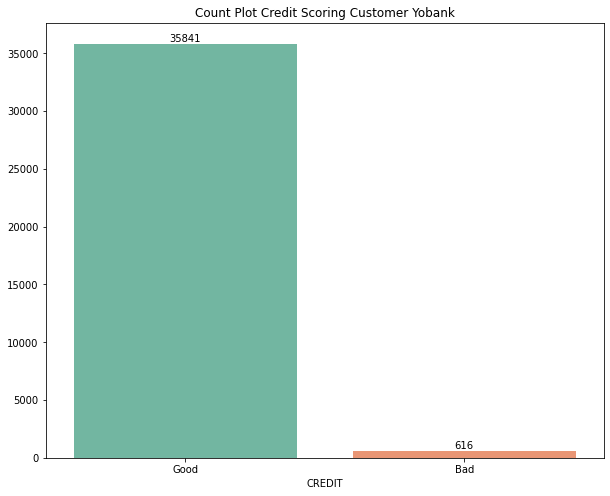

In [26]:
# Plot count
plt.figure(figsize=(10,8))
ax = sns.countplot(x="CREDIT", data=df1, palette="Set2")
ax.set(ylabel="", title="Count Plot Credit Scoring Customer Yobank")
ax.bar_label(ax.containers[0])

# help(sns.countplot)

# Plot category:
def plotKat(kol1, kol2="CREDIT"):
    tbl = pd.crosstab(df1[kol1], df1[kol2])
    plt.figure()
    tbl.plot(kind="bar", stacked=True, color=["blue", "red"],
            figsize=(10,8))
    
    plt.title(kol1+" VS "+kol2)
    pass

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == "__main__":


<Figure size 432x288 with 0 Axes>

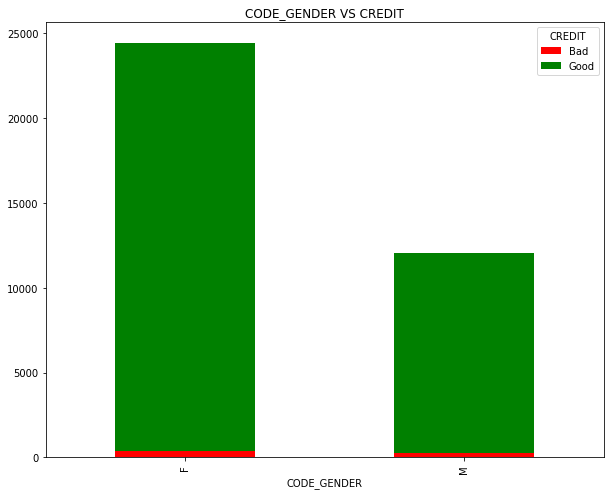

<Figure size 432x288 with 0 Axes>

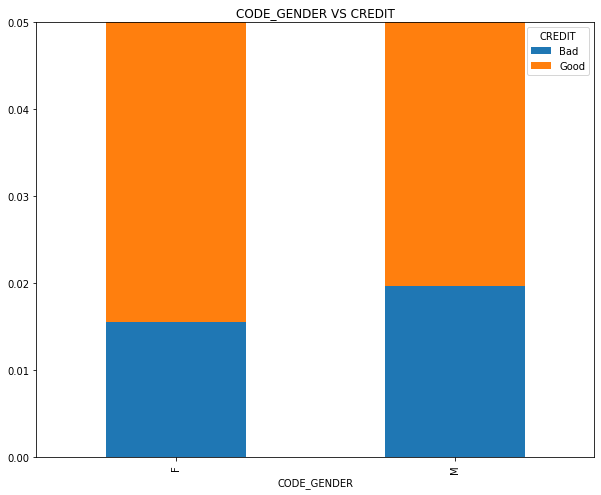

<Figure size 432x288 with 0 Axes>

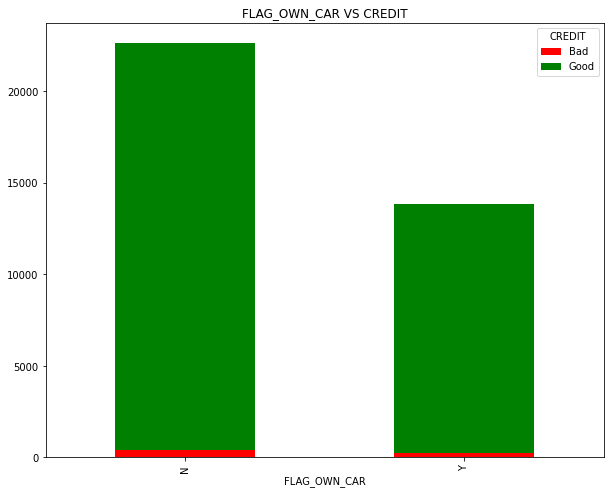

<Figure size 432x288 with 0 Axes>

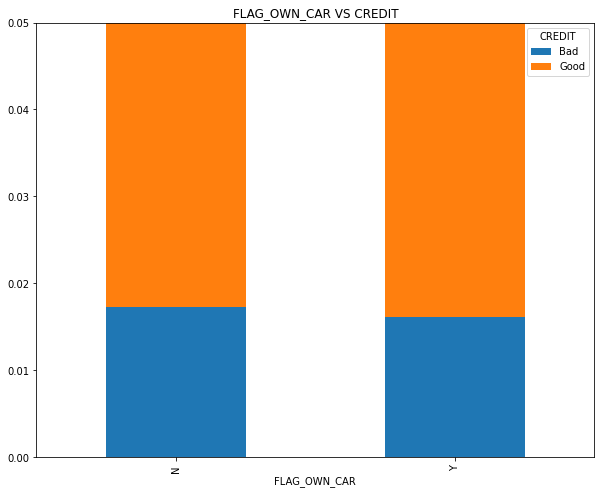

<Figure size 432x288 with 0 Axes>

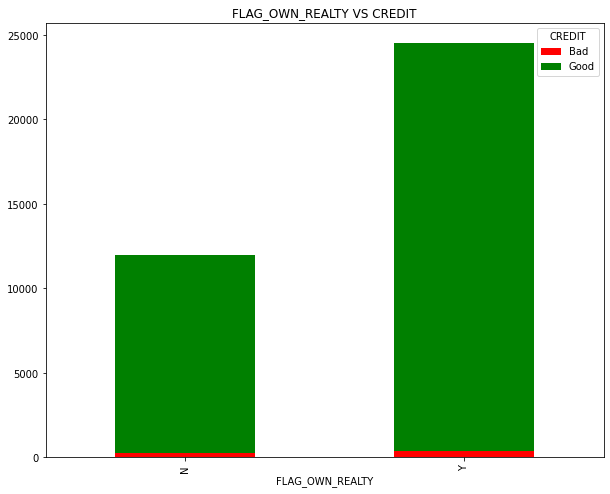

<Figure size 432x288 with 0 Axes>

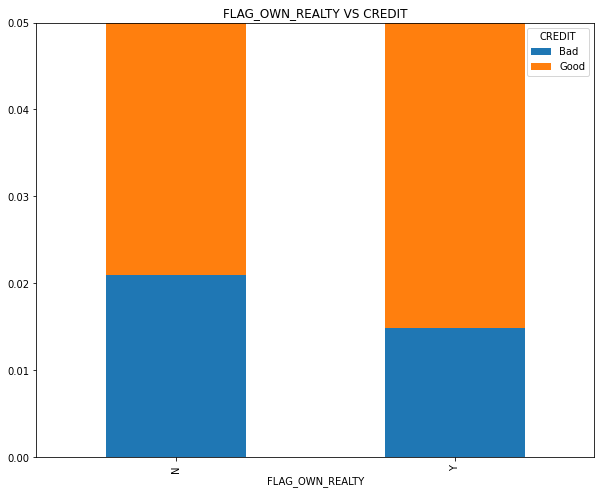

<Figure size 432x288 with 0 Axes>

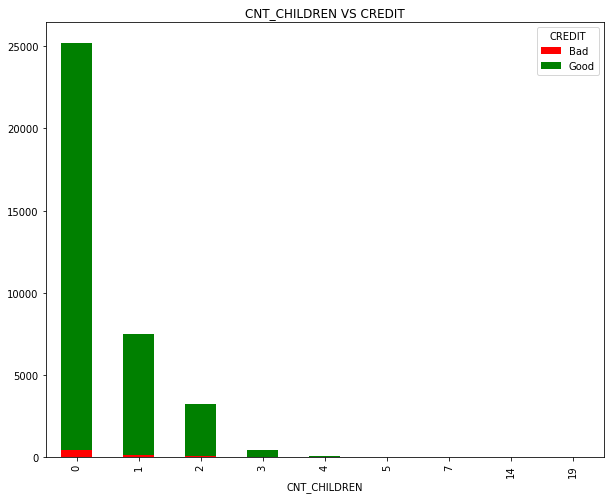

<Figure size 432x288 with 0 Axes>

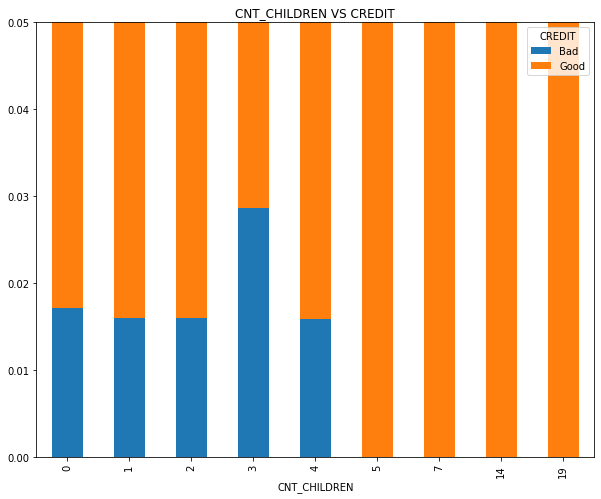

<Figure size 432x288 with 0 Axes>

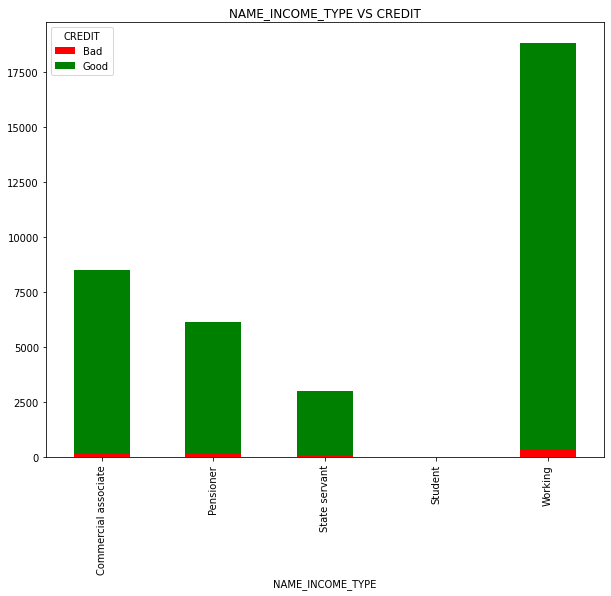

<Figure size 432x288 with 0 Axes>

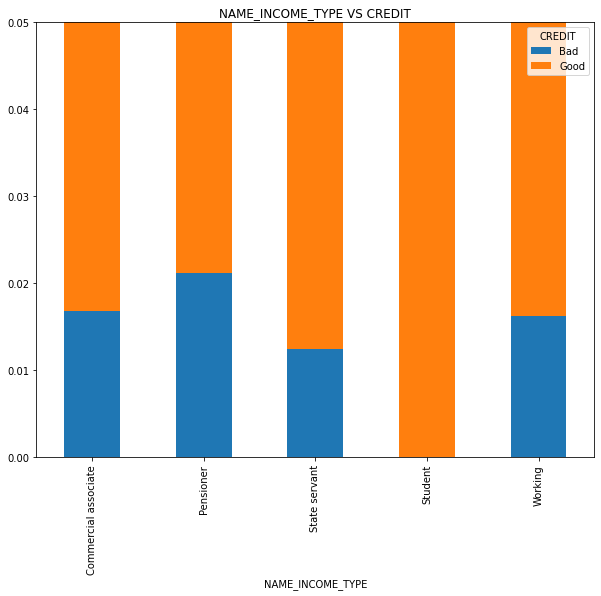

<Figure size 432x288 with 0 Axes>

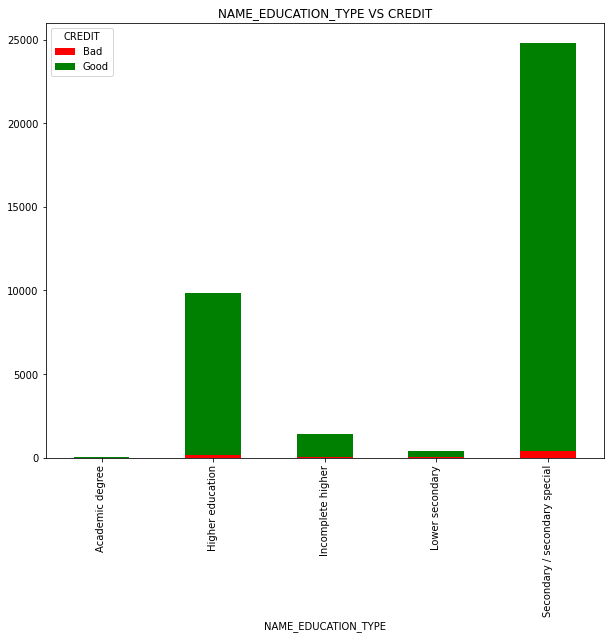

<Figure size 432x288 with 0 Axes>

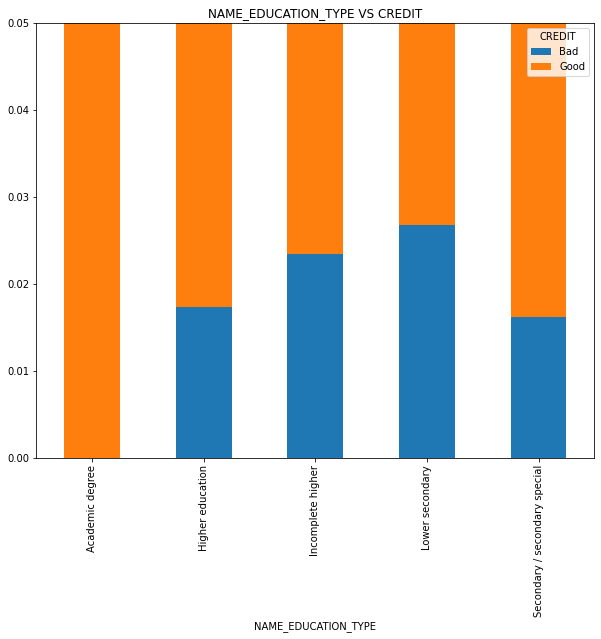

<Figure size 432x288 with 0 Axes>

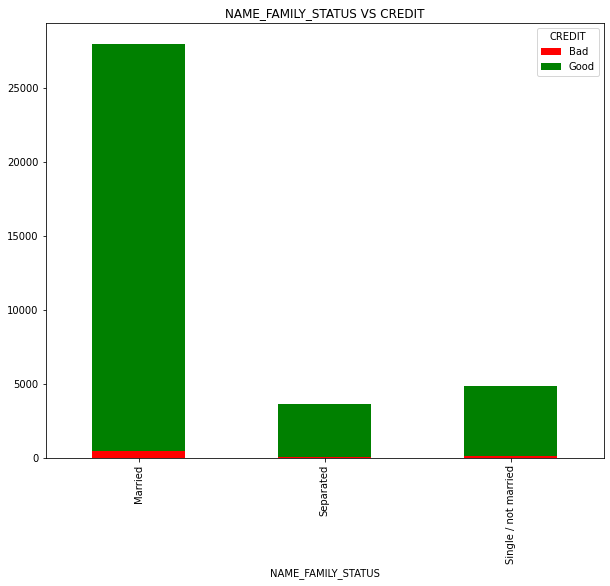

<Figure size 432x288 with 0 Axes>

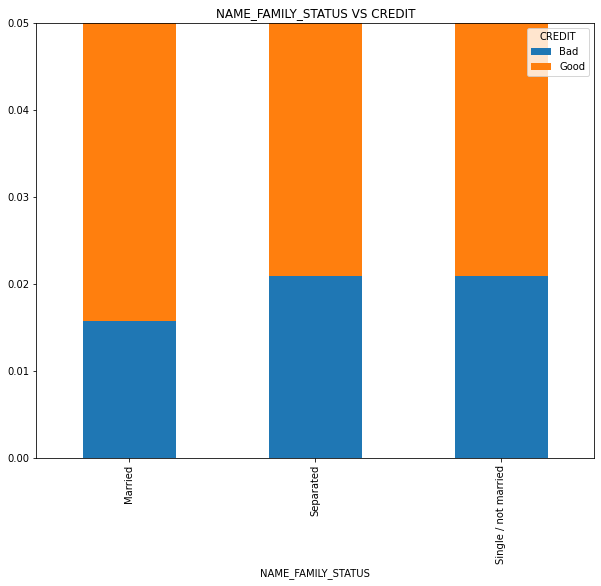

<Figure size 432x288 with 0 Axes>

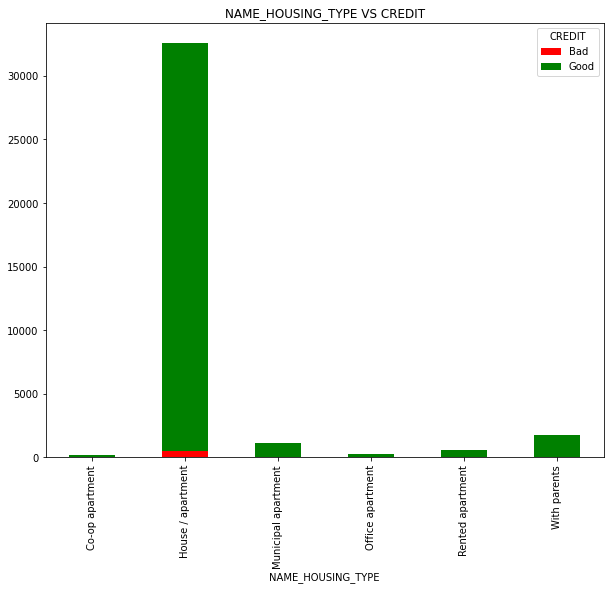

<Figure size 432x288 with 0 Axes>

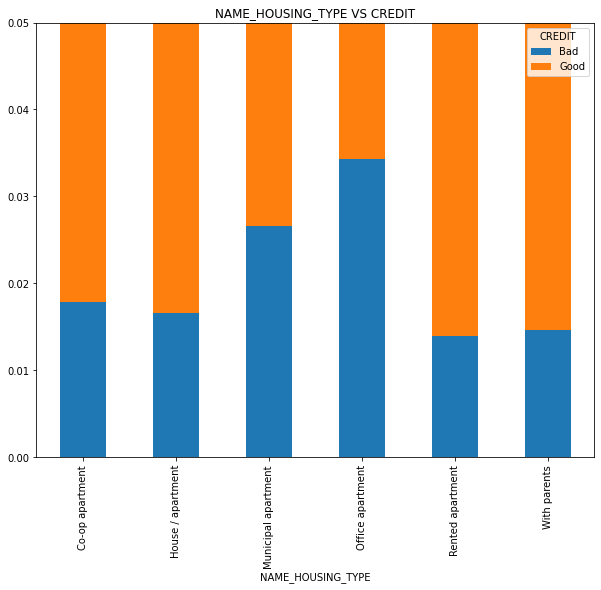

<Figure size 432x288 with 0 Axes>

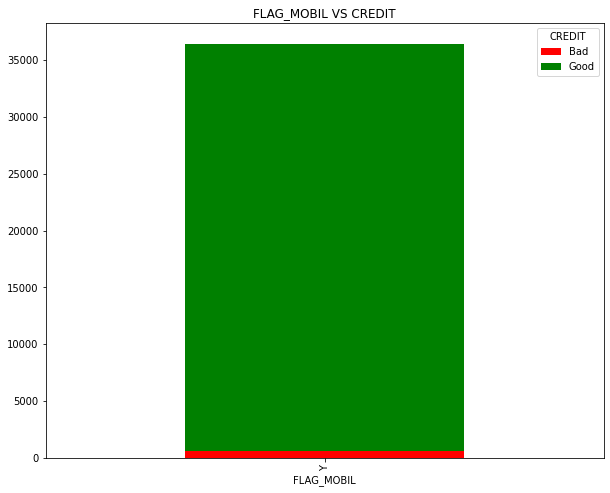

<Figure size 432x288 with 0 Axes>

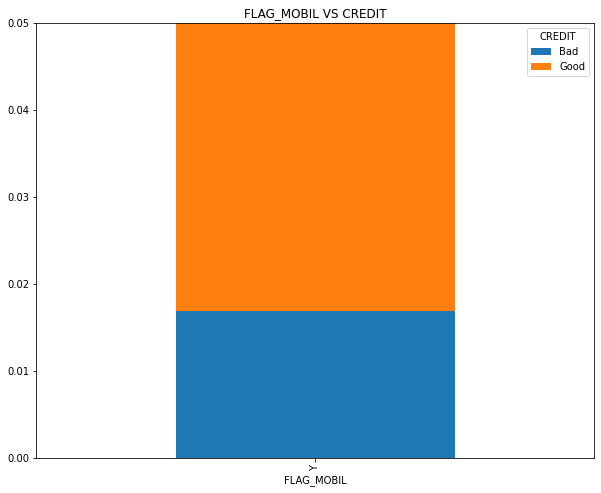

<Figure size 432x288 with 0 Axes>

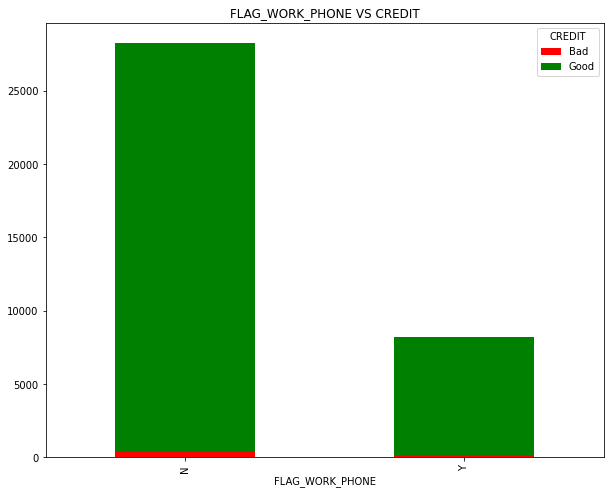

<Figure size 432x288 with 0 Axes>

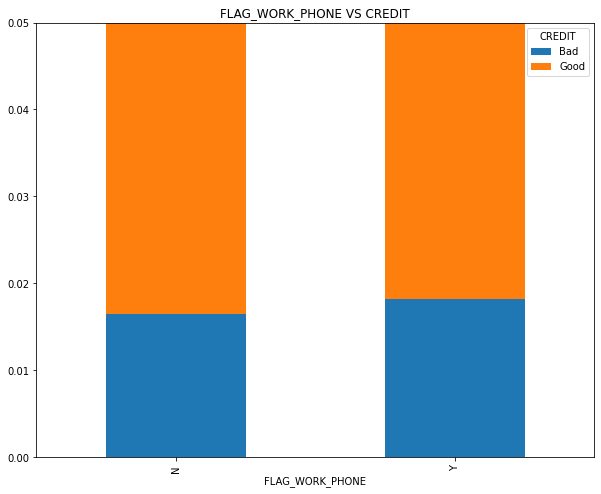

<Figure size 432x288 with 0 Axes>

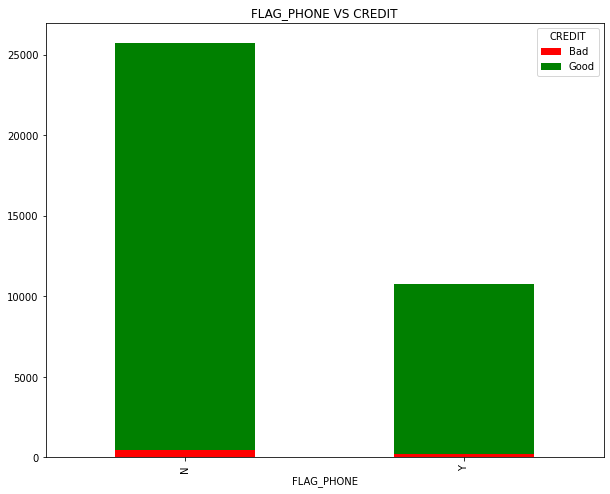

<Figure size 432x288 with 0 Axes>

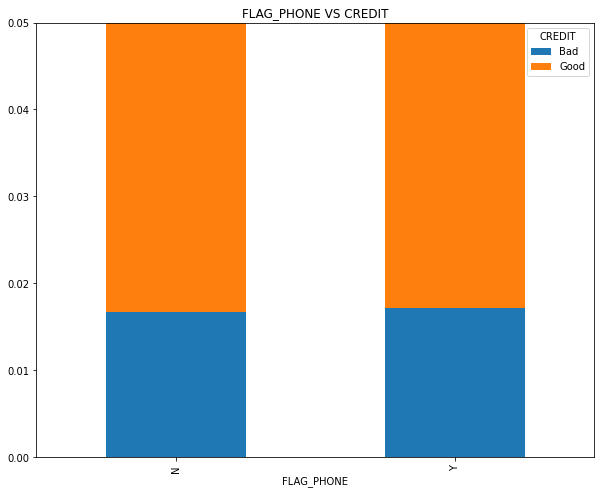

<Figure size 432x288 with 0 Axes>

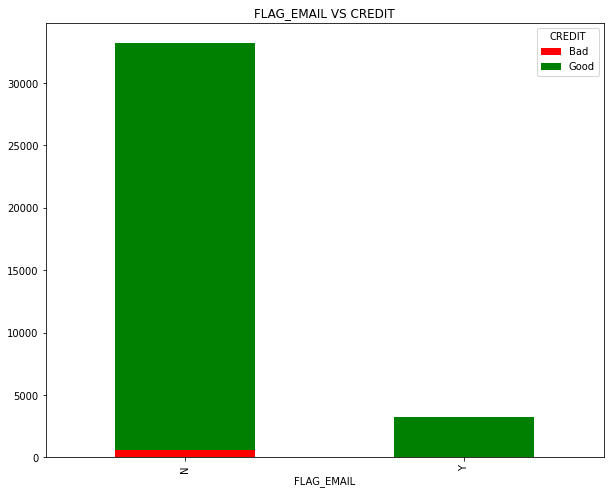

<Figure size 432x288 with 0 Axes>

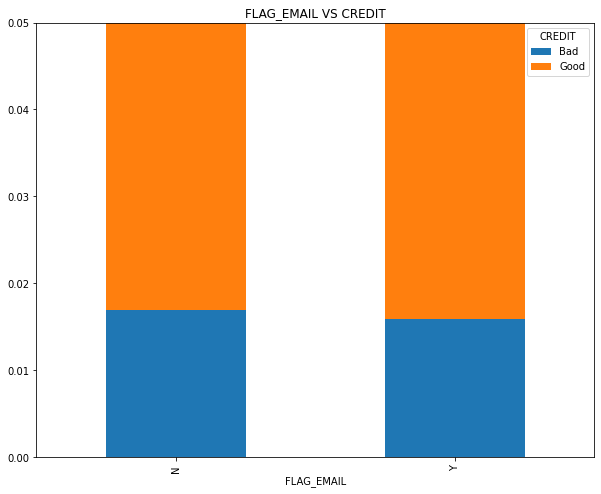

<Figure size 432x288 with 0 Axes>

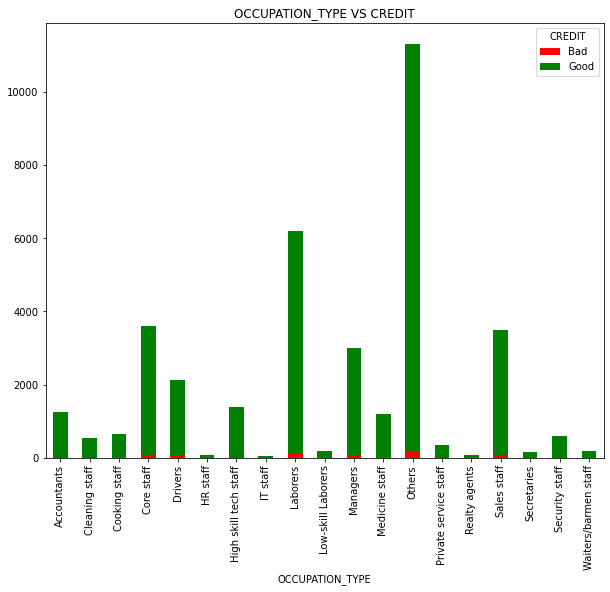

<Figure size 432x288 with 0 Axes>

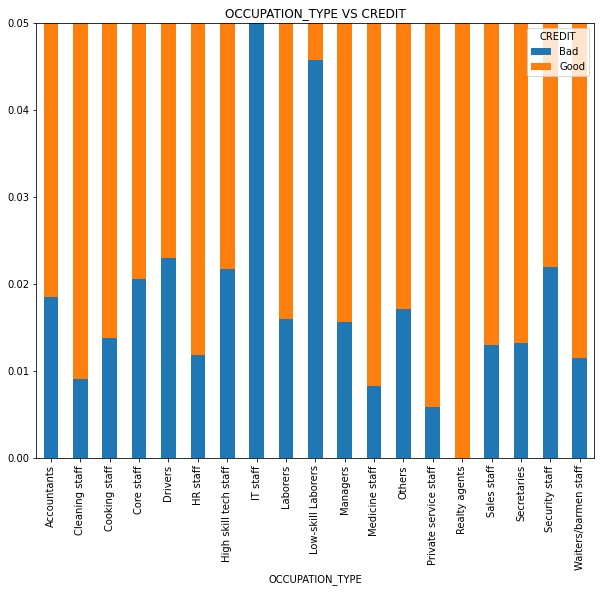

<Figure size 432x288 with 0 Axes>

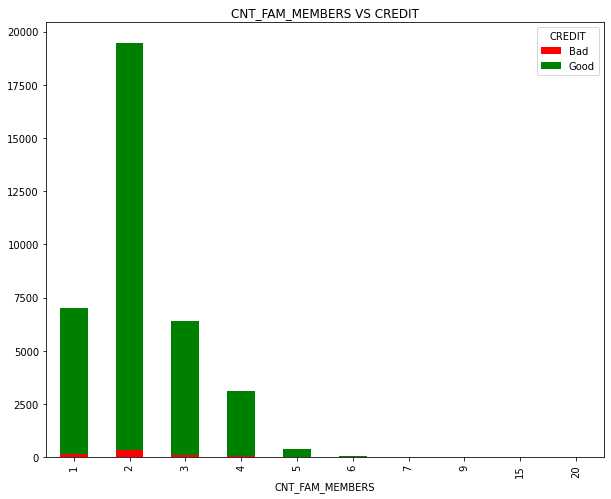

<Figure size 432x288 with 0 Axes>

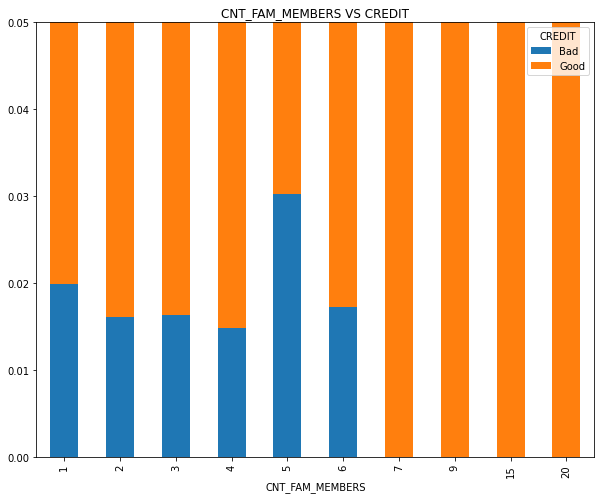

<Figure size 432x288 with 0 Axes>

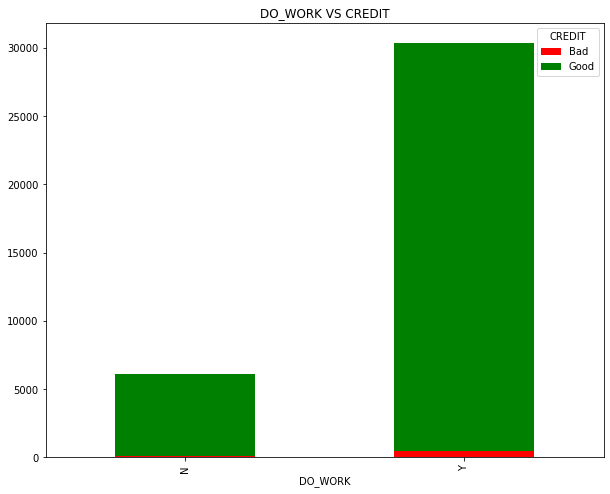

<Figure size 432x288 with 0 Axes>

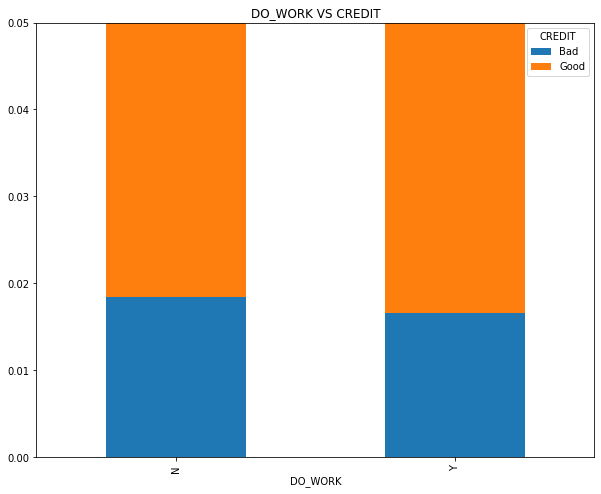

<Figure size 432x288 with 0 Axes>

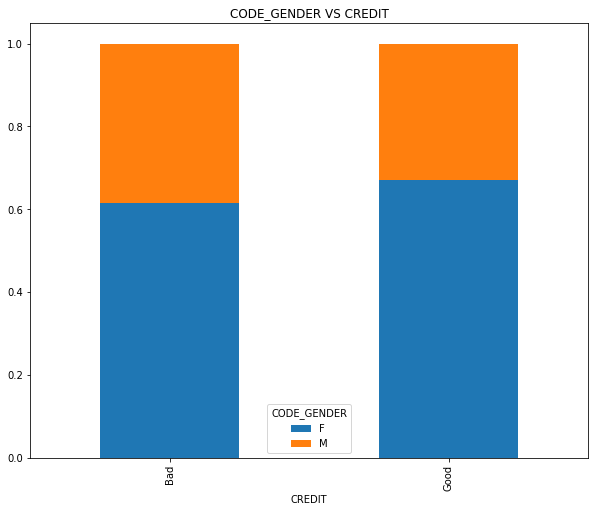

<Figure size 432x288 with 0 Axes>

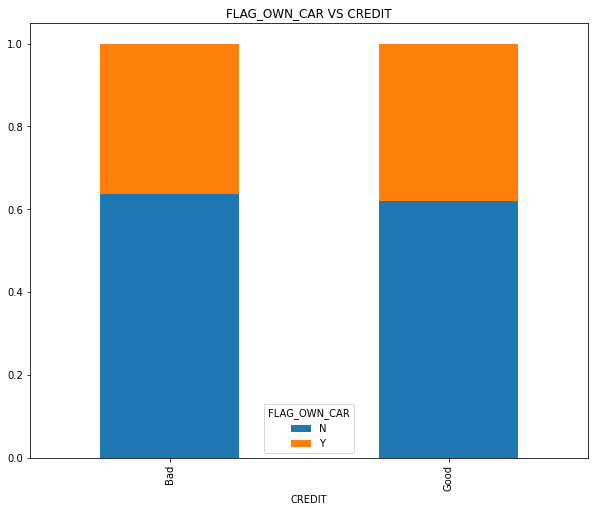

<Figure size 432x288 with 0 Axes>

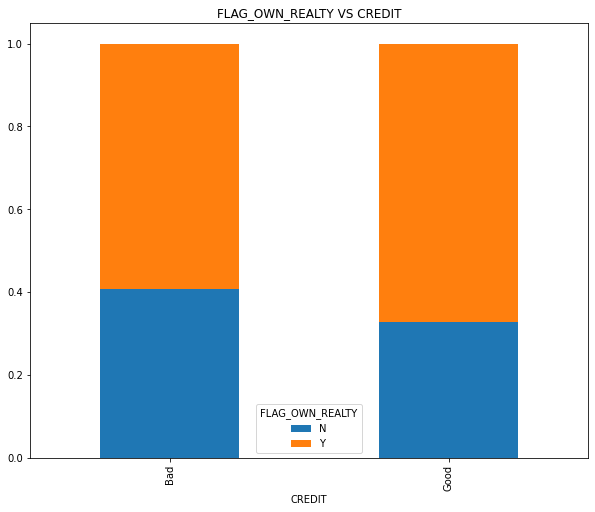

<Figure size 432x288 with 0 Axes>

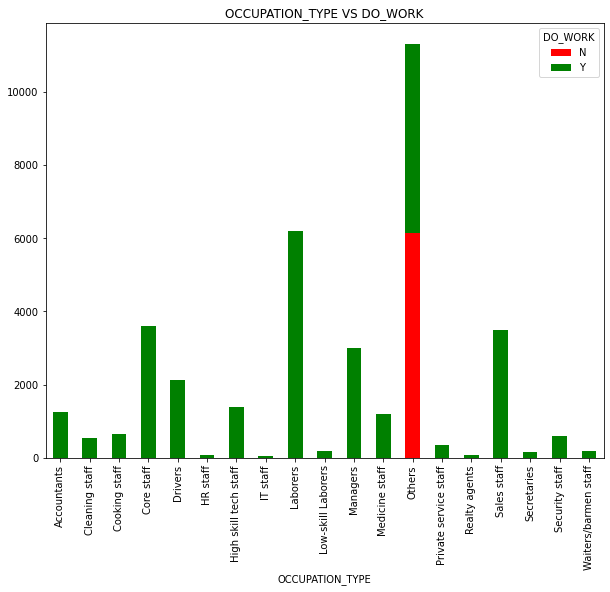

<Figure size 432x288 with 0 Axes>

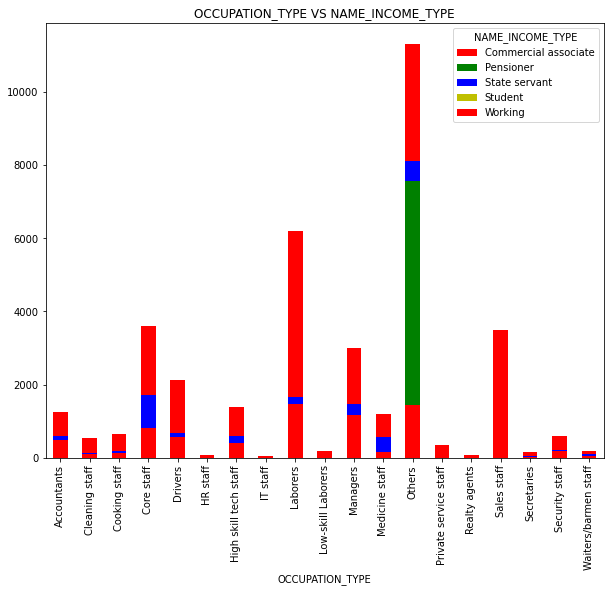

<Figure size 432x288 with 0 Axes>

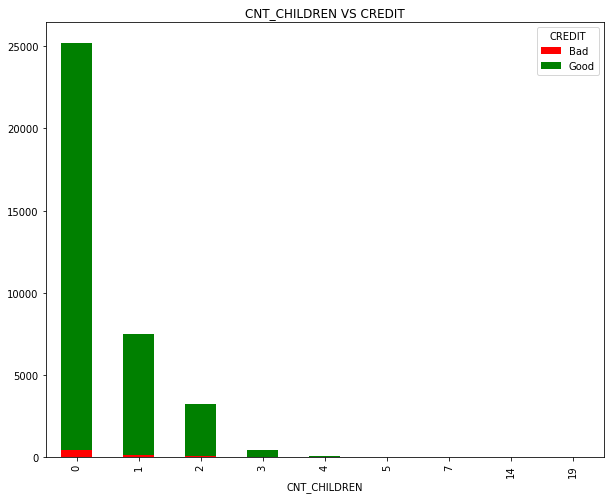

In [30]:
# for j in X1.columns:
#     if X1[j].dtype == "category":
#         plotKat(j)
        

def plotKat2(kol1, kol2="CREDIT"):
    tbl = pd.crosstab(df1[kol1], df1[kol2], #normalize="index"
                     )
    plt.figure()
    tbl.plot(kind="bar", stacked=True, color="r g b y".split(),
            figsize=(10,8))
#     plt.ylim(0,0.05)
    plt.title(kol1+ " VS " +kol2)
    pass

def plotKat2a(kol1, kol2="CREDIT"):
    tbl = pd.crosstab(df1[kol1], df1[kol2], normalize="index"
                     )
    plt.figure()
    tbl.plot(kind="bar", stacked=True, #color=["red", "blue"],
            figsize=(10,8))
    plt.ylim(0,0.05)
    plt.title(kol1+ " VS " +kol2)
    pass


def plotKat2b(kol1, kol2="CREDIT"):
    tbl = pd.crosstab(df1[kol2], df1[kol1], normalize="index")
    plt.figure()
    tbl.plot(kind="bar", stacked=True, figsize=(10,8))
    plt.title(kol1+ " VS " +kol2)
    pass

for j in X1.columns[1:]: # omit 3 to plot all the variables 
    if X1[j].dtype == "object" or X1[j].dtype == "int64" and not j.startswith("DAYS"):
        plotKat2(j)
        plotKat2a(j)
    pass

# useless DO_WORK
for j in X1.columns[1:4]: # omit 3 to plot all the variables 
    if X1[j].dtype == "object" or X1[j].dtype == "int64" and not j.startswith("DAYS"):
        plotKat2b(j)
    pass

plotKat2("OCCUPATION_TYPE", "DO_WORK")
plotKat2("OCCUPATION_TYPE", "NAME_INCOME_TYPE")
plotKat2("CNT_CHILDREN", "CREDIT")

In [9]:
# from statsmodels.graphics.mosaicplot import mosaic


# def plotMosaic(*args, **kwargs):
#     mosaic(kwargs["data"], list(args),
#            labelizer=lambda k: "", ax=plt.gca())
#     pass

# for j in X1.columns[1:3]: # omit 3 to plot all the variables 
#     if X1[j].dtype == "object" or X1[j].dtype == "int64":
#         m = sns.FacetGrid(df1, col="CREDIT", col_wrap=4)
#         m = m.map_dataframe(plotMosaic, j)

<Figure size 720x576 with 0 Axes>

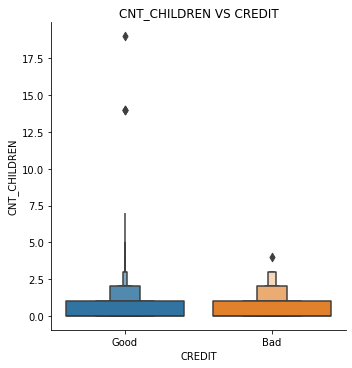

<Figure size 720x576 with 0 Axes>

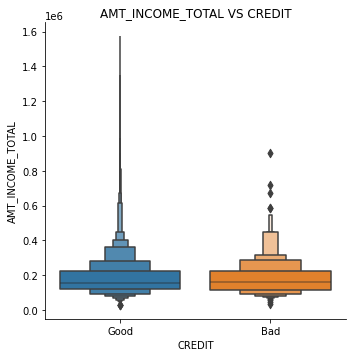

<Figure size 720x576 with 0 Axes>

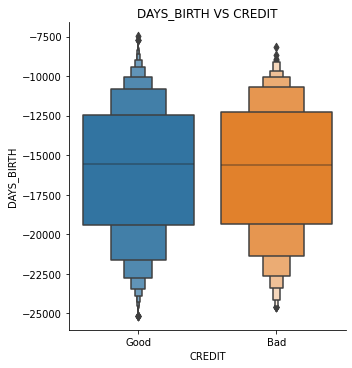

<Figure size 720x576 with 0 Axes>

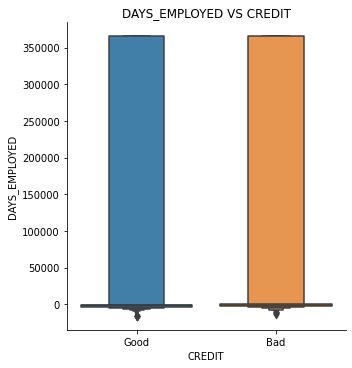

<Figure size 720x576 with 0 Axes>

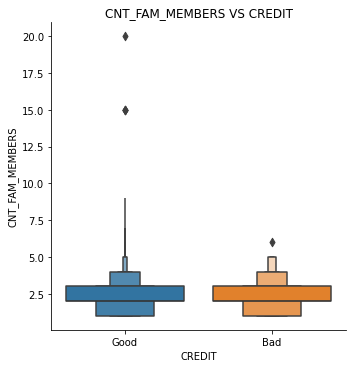

<Figure size 720x576 with 0 Axes>

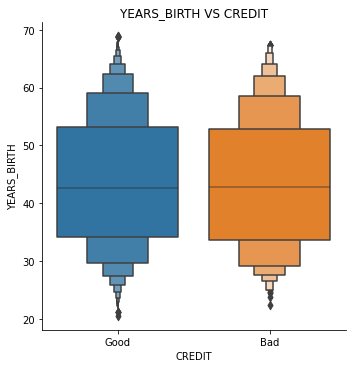

<Figure size 720x576 with 0 Axes>

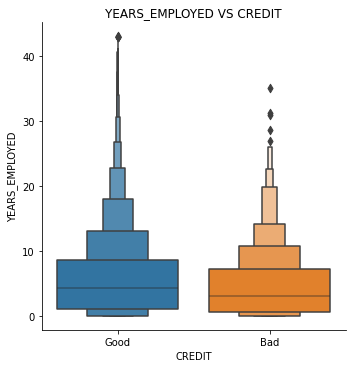

<Figure size 1440x576 with 0 Axes>

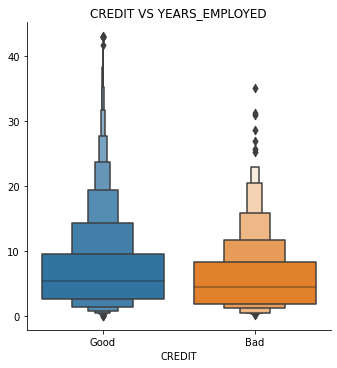

<Figure size 1440x576 with 0 Axes>

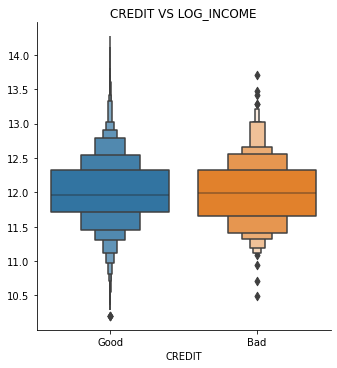

In [10]:
## NUMERIC PLOT

df1.describe()

def plotNum(kol1, kol2="CREDIT"):
    plt.figure(figsize=(10,8))
    sns.catplot(x=kol2,y=kol1,data=df1, kind="boxen")
    
    plt.title(kol1+" VS "+kol2)
    
    
for j in X1.columns[1:]:
    if X1[j].dtype == "float64" or X1[j].dtype == "int64":
        plotNum(j)

        
# PLOT PEKERJAAN ONLY
plt.figure(figsize=(20,8))
p1 = sns.catplot(x="CREDIT",y="YEARS_EMPLOYED", 
                 data=df1[df1.YEARS_EMPLOYED.gt(0)], kind="boxen")
p1.set(ylabel="", title="CREDIT VS YEARS_EMPLOYED")


# PLOT LOG INCOME
df1["LOG_INCOME"] = np.log(df1.AMT_INCOME_TOTAL)
plt.figure(figsize=(20,8))
p1 = sns.catplot(x="CREDIT",y="LOG_INCOME", kind="boxen", data=df1)
p1.set(ylabel="", title="CREDIT VS LOG_INCOME")


<Figure size 1440x576 with 0 Axes>

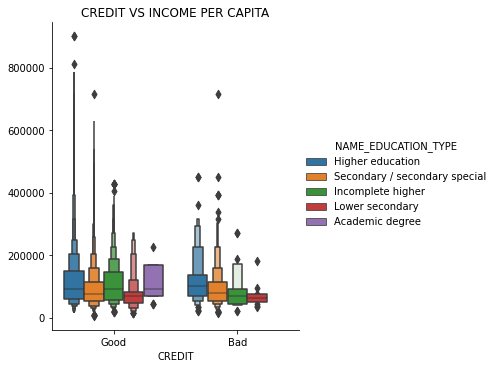

<Figure size 1440x576 with 0 Axes>

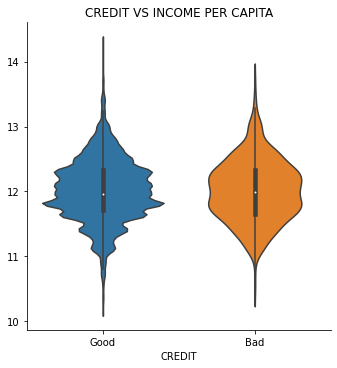

In [11]:

# PLOT INCOME PER CAPITA
df1["INCOME_PC"] = df1.AMT_INCOME_TOTAL/df1.CNT_FAM_MEMBERS
plt.figure(figsize=(20,8))
p1 = sns.catplot(x="CREDIT",y="INCOME_PC", kind="boxen", data=df1, hue="NAME_EDUCATION_TYPE")
p1.set(ylabel="", title="CREDIT VS INCOME PER CAPITA")


# PLOT INCOME PER CAPITA
df1["INCOME_PC"] = df1.AMT_INCOME_TOTAL/df1.CNT_FAM_MEMBERS
plt.figure(figsize=(20,8))
p1 = sns.catplot(x="CREDIT",y="LOG_INCOME", kind="violin", data=df1, #hue="NAME_INCOME_TYPE"
                )
p1.set(ylabel="", title="CREDIT VS INCOME PER CAPITA")

